In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
# Carico le librerie matematiche

%pylab inline

# OSCILLATORE ARMONICO

m       = 0.5                   # kg       massa
k       = 1.                    # N/m      costante elastica della molla

omega   = sqrt(k/m)             # 1/s      pulsazione

T       = 2*(2*pi/omega)        # s        tempo finale (2 periodi)  
dt      = 0.0001                # s        passo temporale

N       = int(round(T/dt))      #          numero di istanti temporali considerati

t       = arange(0,T,dt)        # s        creo un vettore con valori del tempo crescenti spaziati di dt
x       = zeros(N)              # m        creo un vettore di zeri che conterrà i valori di x(t) a istanti successivi t         
v       = zeros(N)              # m/s      creo un vettore di zeri che conterrà i valori di v(t) a istanti successivi t 
a       = zeros(N)              # m/s**2   creo un vettore di zeri che conterrà i valori di a(t) a istanti successivi t 

# Dati iniziali:

x[0]    = 0.5                   # m        posizione iniziale
v[0]    = 0                     # m/s      velocità iniziale

# Integrazione numerica dell'equazione differenziale
# Si utilizza a scopo didattico un metodo di integrazione elementare (metodo di Eulero) che richiede un passo dt molto piccolo
# Metodi di integrazione numerica più raffinati sono disponibili nella libreria scipy.integrate.odeint, si veda ad esempio:
# http://nbviewer.ipython.org/gist/dpsanders/d417c1ffbb76f13f678c

for i in range(0,N-1):          
    a[i+1] = -omega**2 * x[i]   # <------- l'accelerazione ora non è più costante!
    v[i+1] = v[i] + a[i] * dt
    x[i+1] = x[i] + v[i] * dt

Populating the interactive namespace from numpy and matplotlib


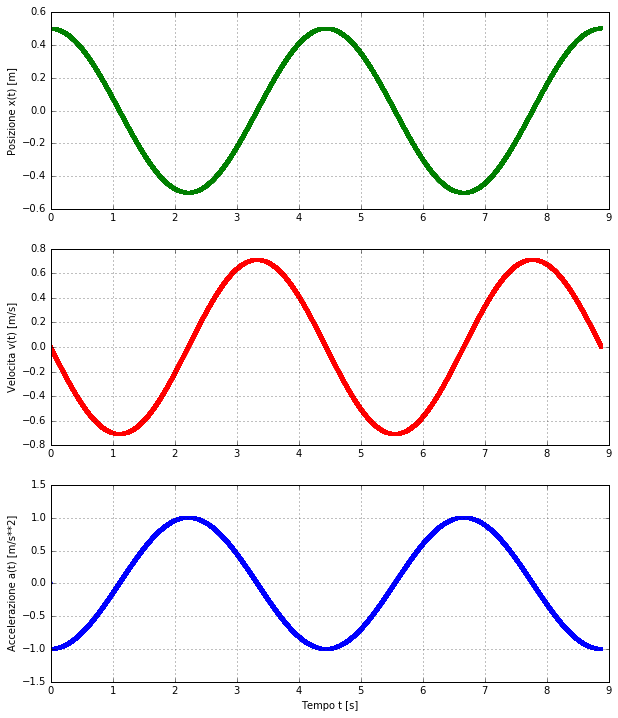

In [2]:
# SI NOTI CHE LE FUNZIONI SIN E COS NON COMPAIONO NEL CODICE
# MA VENGONO CALCOLATE NUMERICAMENTE PER MEZZO DELLE RIGHE
#
# for i in range(0,N-1):          
#     a[i+1] = -omega**2 * x[i]
#     v[i+1] = v[i] + a[i] * dt
#     x[i+1] = x[i] + v[i] * dt

fig=figure(figsize=(10,12))

fig.add_subplot(311)
plot(t,x,'g.')
grid()
ylabel('Posizione x(t) [m]')

fig.add_subplot(312)
plot(t,v,'r.')
grid()
ylabel('Velocita'' v(t) [m/s]')

fig.add_subplot(313)
plot(t,a,'b.')
grid()
ylabel('Accelerazione a(t) [m/s**2]')
xlabel('Tempo t [s]')

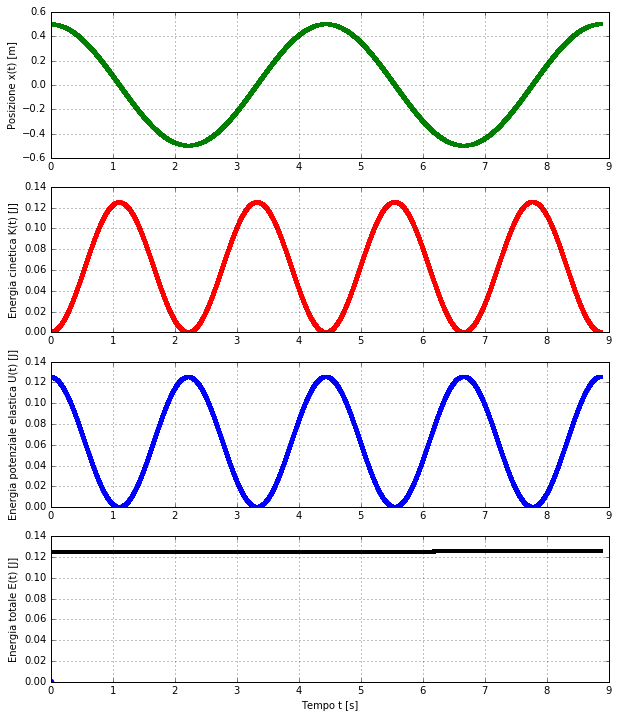

In [3]:
K       = (m/2.)*v**2           # J        energia cinetica
U       = (k/2.)*x**2           # J        energia potenziale elastica
E       = U + K                 # J        energia meccanica totale

# SI NOTI CHE L'ENERGIA NON È ESATTAMENTE CONSERVATA, MA È CONSERVATA
# CON PIÙ PRECISIONE SE SI SCEGLIE dt PIÙ PICCOLO (VERIFICARE!!)
# Controllare la conservazione dell'energia è un buon modo per 
# verificare la precisione di un codice numerico come questo

fig=figure(figsize=(10,12))

fig.add_subplot(411)
plot(t,x,'g.')
grid()
ylabel('Posizione x(t) [m]')

fig.add_subplot(412)
plot(t,K,'r.')
grid()
ylabel('Energia cinetica K(t) [J]')

fig.add_subplot(413)
plot(t,U,'b.')
grid()
ylabel('Energia potenziale elastica U(t) [J]')

fig.add_subplot(414)
plot(t,E,'k.')
plot(0,0,'o')
grid()
xlabel('Tempo t [s]')
ylabel('Energia totale E(t) [J]')

In [5]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

#animation.Animation._repr_html_ = anim_to_html

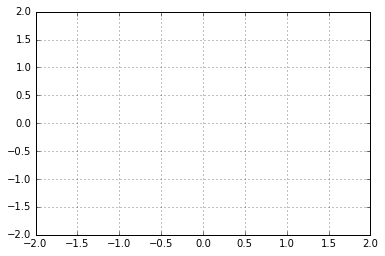

In [13]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1


A=sqrt(2*E[0]/k); Kmax=K.max(); Umax=U.max()
w=.2; h=.2; H=.4; skip=200

"""
fig=figure(figsize=(5,2.))
ax=fig.add_subplot(111)
txt=text(.1,.76*H,'t = 0'); text(1.6*A,-.2*H,'K'); text(1.9*A,-.2*H,'U')
axis('equal'); xlabel('x [m]'); ax.set_yticklabels([])
xlim(-2*A,3*A); ylim(-.3,.5); grid(); fig.tight_layout()
"""

mass   = Rectangle( (x[0]-w/2 , -h/2) , w        , h              , facecolor='green') 
spring = Rectangle( (0        , -h/8) , x[0]-w/2 , h/4            , color='black') 
Kbar   = Rectangle( (1.5*A    , 0   ) , w/2      , .8*H*K[0]/Kmax , facecolor='red')
Ubar   = Rectangle( (1.8*A    , 0   ) , w/2      , .8*H*U[0]/Umax , facecolor='blue')

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#display_animation(anim)

#anim.save('double_pendulum.mp4', fps=15)

plt.show()